<a href="https://colab.research.google.com/github/cbishop4/MSE7530/blob/main/ClassNotebooks/RRdemo_20250924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rietveld Refinement Demo
MSE 7530, Fall 2025

All code is from https://powerxrd.readthedocs.io/en/latest/

# `POWERXRD` documentation

Simply put, `powerxrd` is an open-source Python package for the analysis of XRD data. To the typical Python user, it may be easier to use `powerxrd` than [Origin](https://www.originlab.com/fileexchange/details.aspx?fid=554) for this kind of analysis, albeit at a high-level; Origin may still be desired for more advanced XRD analysis.

[powerxrd on Github](https://github.com/andrewrgarcia/powerxrd)<br>
[PyPI project](https://pypi.org/project/powerxrd/)


# Getting Started

(This is different than what we usually do in class; I have simply kept it consistent with the source I pulled from online)

In your system, `powerxrd` can be installed using pip with the `pip install powerxrd` command. As this is a Python Notebook, `powerxrd` is installed with the below routine:

In [1]:
# install needed modules
import sys
if 'google.colab' in sys.modules:
  %pip install --upgrade powerxrd

## Rietveld Refinement
To illustrate, we will work with the model provided by default in the package. This works for a cubic lattice, and uses a sample dataset included in the package. There are many built-in functions in the package; we won't worry about understanding them here.  
<font size=4><font color='blue'> The **goal** of this demo is for you to see the steps taken by a typical Rietveld refinement software.

/usr/local/lib/python3.12/dist-packages/powerxrd/model.py:50: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(wavelength / (2 * d))


You must specify a file path for real data. Using simulated data (CubicModel) now.
Initial parameters: {'a': 4.0, 'U': 0.005, 'W': 0.005, 'scale': 1000.0, 'bkg_slope': 0.0, 'bkg_intercept': 0.0}


Refining parameters: ['scale']
Initial values: [1000.]
Refined values: [404.61533838]
Current model.params: {'a': 4.0, 'U': 0.005, 'W': 0.005, 'scale': 404.61533837788534, 'bkg_slope': 0.0, 'bkg_intercept': 0.0}


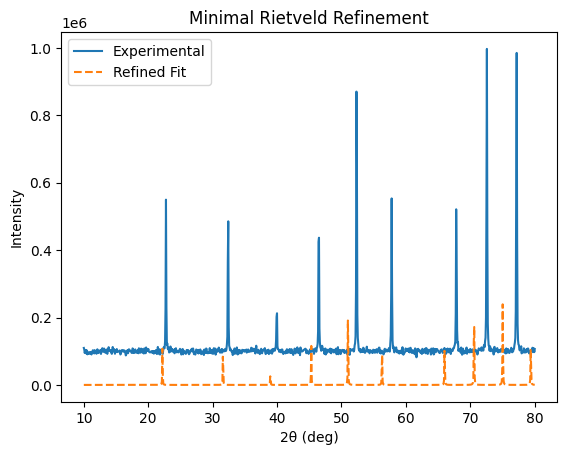

Rwp: 99.30%, Rp: 98.57%
Refined parameters: {'a': 4.0, 'U': 0.005, 'W': 0.005, 'scale': 404.61533837788534, 'bkg_slope': 0.0, 'bkg_intercept': 0.0}


Refining parameters: ['bkg_intercept', 'bkg_slope']
Initial values: [0. 0.]
Refined values: [95300.53540105   301.11536605]
Current model.params: {'a': 4.0, 'U': 0.005, 'W': 0.005, 'scale': 404.61533837788534, 'bkg_slope': 301.1153660467793, 'bkg_intercept': 95300.53540105167}


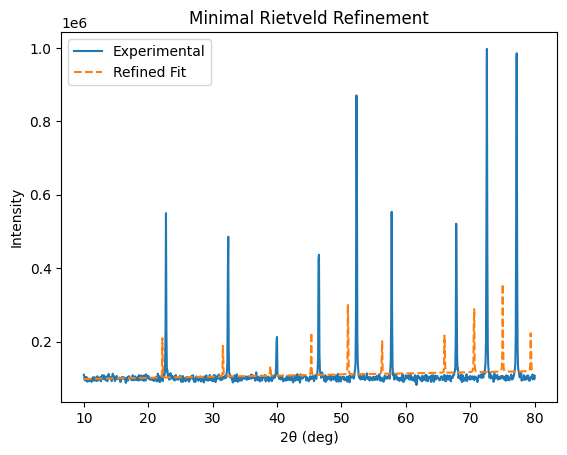

Rwp: 52.55%, Rp: 18.09%
Refined parameters: {'a': 4.0, 'U': 0.005, 'W': 0.005, 'scale': 404.61533837788534, 'bkg_slope': 301.1153660467793, 'bkg_intercept': 95300.53540105167}


Refining parameters: ['a']
Initial values: [4.]
Refined values: [3.99934882]
Current model.params: {'a': 3.999348821870766, 'U': 0.005, 'W': 0.005, 'scale': 404.61533837788534, 'bkg_slope': 301.1153660467793, 'bkg_intercept': 95300.53540105167}


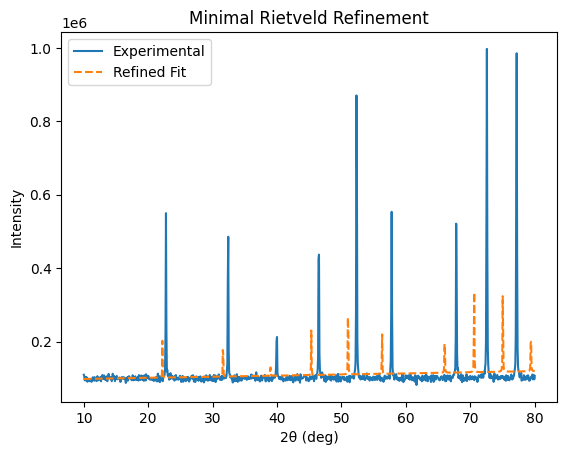

Rwp: 52.50%, Rp: 18.08%
Refined parameters: {'a': 3.999348821870766, 'U': 0.005, 'W': 0.005, 'scale': 404.61533837788534, 'bkg_slope': 301.1153660467793, 'bkg_intercept': 95300.53540105167}


Refining parameters: ['a']
Initial values: [3.93]
Refined values: [3.9292661]
Current model.params: {'a': 3.9292660963903465, 'U': 0.005, 'W': 0.005, 'scale': 404.61533837788534, 'bkg_slope': 301.1153660467793, 'bkg_intercept': 95300.53540105167}


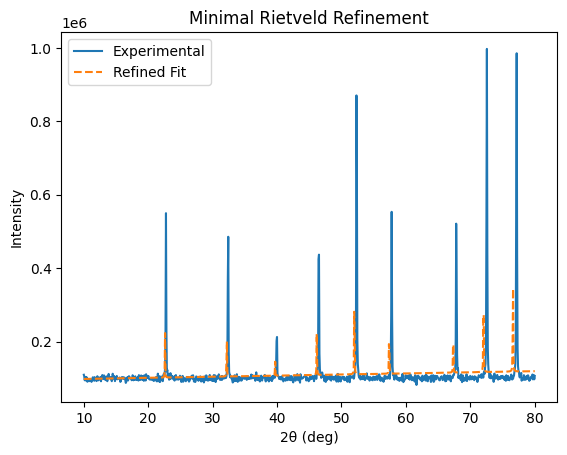

Rwp: 52.07%, Rp: 17.61%
Refined parameters: {'a': 3.9292660963903465, 'U': 0.005, 'W': 0.005, 'scale': 404.61533837788534, 'bkg_slope': 301.1153660467793, 'bkg_intercept': 95300.53540105167}


Refining parameters: ['U', 'W']
Initial values: [0.005 0.005]


/usr/local/lib/python3.12/dist-packages/powerxrd/model.py:69: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(U * np.tan(theta) ** 2 + W)


ValueError: array must not contain infs or NaNs

In [ ]:


# Load pattern -> not specifying file loads a simulated cubicModel pattern
x_exp, y_exp = rr.load_data()
saved_stages = []

# Initial guess
model.params = {
    "a": 4.0,               # Lattice constant (Å)
    "U": 0.005,             # Caglioti U (peak width, radians²)
    "W": 0.005,             # Caglioti W (peak width, radians²)
    "scale": 1000.0,        # Scale factor
    "bkg_slope": 0.0,
    "bkg_intercept": 0.0
}

print("Initial parameters:", model.params)

# Pass 1: Refine only scale
rr.refine(model, x_exp, y_exp, ['scale'], save_params=saved_stages)
rr.plot_fit(model, x_exp, y_exp, model.pattern(x_exp))

# Pass 2: Refine only background
rr.refine(model, x_exp, y_exp, ['bkg_intercept', 'bkg_slope'], save_params=saved_stages)
rr.plot_fit(model, x_exp, y_exp, model.pattern(x_exp))

# Pass 3: Refine lattice constant
rr.refine(model, x_exp, y_exp, ['a'], save_params=saved_stages)
rr.plot_fit(model, x_exp, y_exp, model.pattern(x_exp))

# Pass 4: Refine lattice constant, again, with initial guess of 3.93
model.params["a"] = 3.93
rr.refine(model, x_exp, y_exp, ['a'], save_params=saved_stages)
rr.plot_fit(model, x_exp, y_exp, model.pattern(x_exp))

# Pass 5: Refine profile parameters
rr.refine(model, x_exp, y_exp, ['U', 'W'], save_params=saved_stages)
rr.plot_fit(model, x_exp, y_exp, model.pattern(x_exp))

# Pass 6: Refine all together
rr.refine(model, x_exp, y_exp, ['scale', 'a', 'U', 'W', 'bkg_intercept', 'bkg_slope'], save_params=saved_stages)
rr.plot_fit(model, x_exp, y_exp, model.pattern(x_exp))

<font size=4> Step 1: Specify initial parameters. This requires some prior knowledge of your system.

In [4]:
import powerxrd.refine as rr
from powerxrd.model import CubicModel

model = CubicModel()  # Just doing cubicModels now

/usr/local/lib/python3.12/dist-packages/powerxrd/model.py:50: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(wavelength / (2 * d))


In [5]:


# Load pattern -> not specifying file loads a simulated cubicModel pattern
x_exp, y_exp = rr.load_data()
saved_stages = []

# Initial guess
model.params = {
    "a": 4.0,               # Lattice constant (Å)
    "U": 0.005,             # Caglioti U (peak width, radians²)
    "W": 0.005,             # Caglioti W (peak width, radians²)
    "scale": 1000.0,        # Scale factor
    "bkg_slope": 0.0,
    "bkg_intercept": 0.0
}
print("Initial parameters:", model.params)

You must specify a file path for real data. Using simulated data (CubicModel) now.
Initial parameters: {'a': 4.0, 'U': 0.005, 'W': 0.005, 'scale': 1000.0, 'bkg_slope': 0.0, 'bkg_intercept': 0.0}


<font size=4> Step 2. Refine the "scale" parameter, which scales the overall intensity of the model.



Refining parameters: ['scale']
Initial values: [1000.]
Refined values: [400.64631749]
Current model.params: {'a': 4.0, 'U': 0.005, 'W': 0.005, 'scale': 400.64631749440264, 'bkg_slope': 0.0, 'bkg_intercept': 0.0}


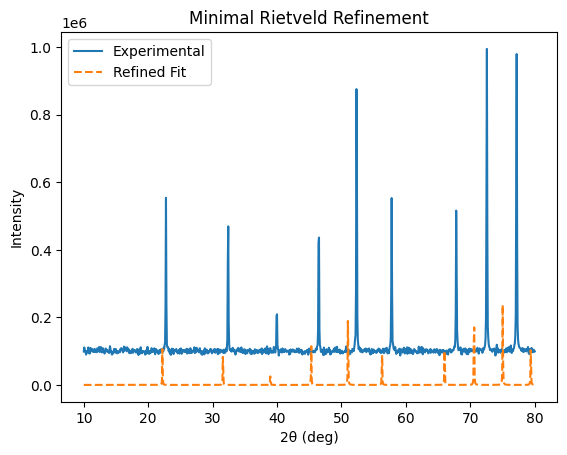

Rwp: 99.31%, Rp: 98.59%
Refined parameters: {'a': 4.0, 'U': 0.005, 'W': 0.005, 'scale': 400.64631749440264, 'bkg_slope': 0.0, 'bkg_intercept': 0.0}


In [6]:
# Pass 1: Refine only scale
rr.refine(model, x_exp, y_exp, ['scale'], save_params=saved_stages)
rr.plot_fit(model, x_exp, y_exp, model.pattern(x_exp))

<font size=4> Step 3. Refining the background subtraction.



Refining parameters: ['bkg_intercept', 'bkg_slope']
Initial values: [96225.00938198   279.84724145]
Refined values: [96225.00938198   279.84724145]
Current model.params: {'a': 4.0, 'U': 0.005, 'W': 0.005, 'scale': 400.64631749440264, 'bkg_slope': 279.8472414511466, 'bkg_intercept': 96225.00938197767}


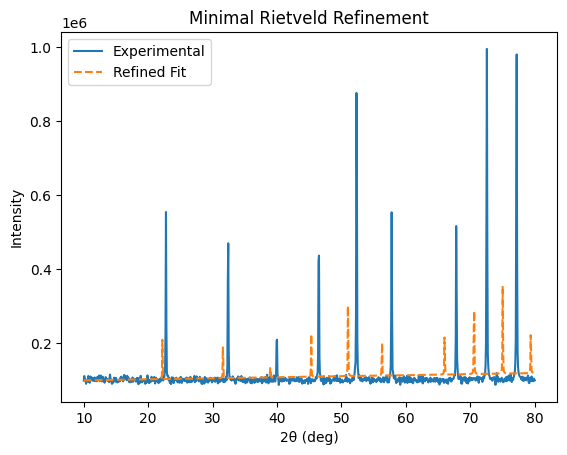

Rwp: 52.42%, Rp: 17.97%
Refined parameters: {'a': 4.0, 'U': 0.005, 'W': 0.005, 'scale': 400.64631749440264, 'bkg_slope': 279.8472414511466, 'bkg_intercept': 96225.00938197767}


In [8]:
# Pass 2: Refine only background
rr.refine(model, x_exp, y_exp, ['bkg_intercept', 'bkg_slope'], save_params=saved_stages)
rr.plot_fit(model, x_exp, y_exp, model.pattern(x_exp))

<font size=4> Step 4. Refine the lattice constant.
As you will see, letting it automatically refine the constant did not improve anything.



Refining parameters: ['a']
Initial values: [4.]
Refined values: [3.99928171]
Current model.params: {'a': 3.9992817145241735, 'U': 0.005, 'W': 0.005, 'scale': 400.64631749440264, 'bkg_slope': 279.8472414511466, 'bkg_intercept': 96225.00938197767}


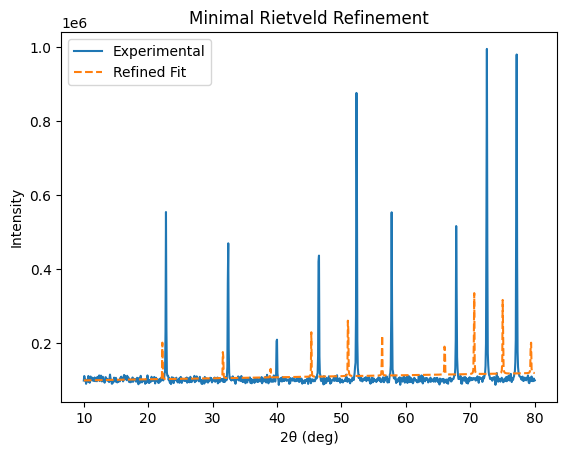

Rwp: 52.37%, Rp: 17.95%
Refined parameters: {'a': 3.9992817145241735, 'U': 0.005, 'W': 0.005, 'scale': 400.64631749440264, 'bkg_slope': 279.8472414511466, 'bkg_intercept': 96225.00938197767}


In [9]:
# Pass 3: Refine lattice constant
rr.refine(model, x_exp, y_exp, ['a'], save_params=saved_stages)
rr.plot_fit(model, x_exp, y_exp, model.pattern(x_exp))

<font size=4> Step 4.5: Another try at refining the lattice constant. This time, we specify it to try to get out of the **local minimum**.



Refining parameters: ['a']
Initial values: [3.93]
Refined values: [3.92931139]
Current model.params: {'a': 3.9293113898971925, 'U': 0.005, 'W': 0.005, 'scale': 400.64631749440264, 'bkg_slope': 279.8472414511466, 'bkg_intercept': 96225.00938197767}


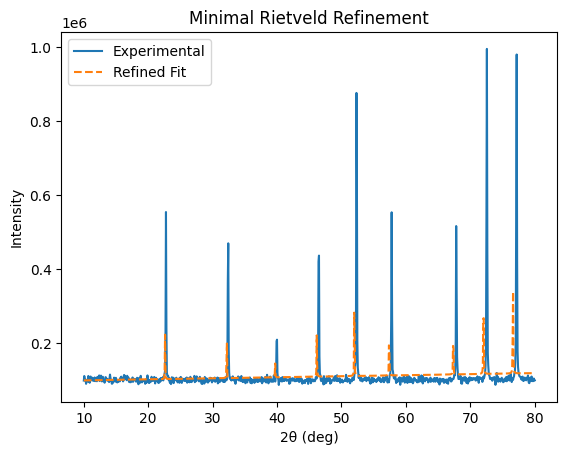

Rwp: 51.96%, Rp: 17.51%
Refined parameters: {'a': 3.9293113898971925, 'U': 0.005, 'W': 0.005, 'scale': 400.64631749440264, 'bkg_slope': 279.8472414511466, 'bkg_intercept': 96225.00938197767}


In [10]:
# Pass 4: Refine lattice constant, again, with initial guess of 3.93
model.params["a"] = 3.93
rr.refine(model, x_exp, y_exp, ['a'], save_params=saved_stages)
rr.plot_fit(model, x_exp, y_exp, model.pattern(x_exp))

<font size=4> This process is repeated until the fit converges. **The parameters that come out may or may not be physical.**